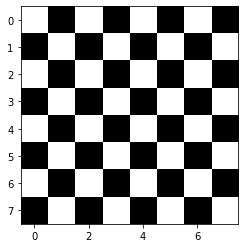

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the initial checkerboard pattern
fig = plt.figure()
damier = np.zeros((8,8))
damier[1::2,::2] = 1
damier[::2,1::2] = 1

#how many blacks among your neighbors

def count_black_neighbors(arr, index):
    i, j = index
    height, width = arr.shape
    mask = np.zeros((3, 3), dtype=int)
    mask[1, 1] = 1
    i_range = np.array(range(max(i-1, 0), min(i+2, height)))
    j_range = np.array(range(max(j-1, 0), min(j+2, width)))
    mask[i_range-i+1, j_range-j+1] = 1
    return np.sum(arr[i_range, j_range] * mask) - arr[i, j]


# Define the update function
def update(frame):
    # follow the rule of game of life
    cp = damier.copy()
    for i in range(8):
        for j in range(8):
            n = 
            if(cp[i,j] == 1 and (n != 3 and n != 2)):
                damier[i,j] = 0
            if(cp[i,j] == 0 and n == 3):
                damier[i,j] = 1
    plt.imshow(damier, cmap = 'binary')
    return

# Create the animation
ani = FuncAnimation(fig, update, frames=range(10), interval=1000)
html_anim = HTML(ani.to_jshtml())
display(html_anim)

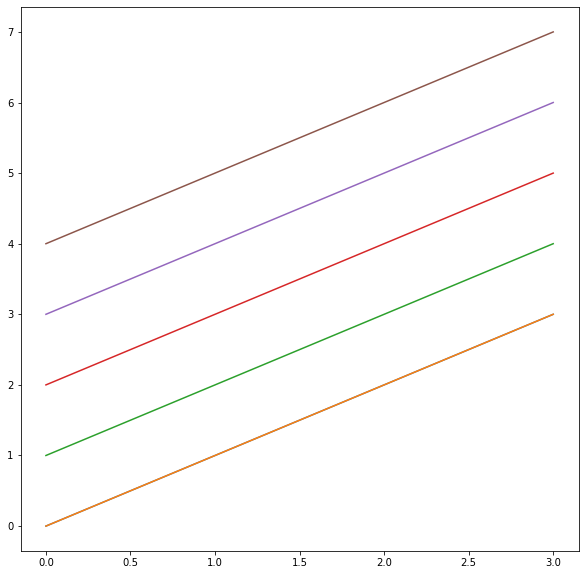

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Créer une figure vide
fig = plt.figure(figsize=(10,10))
#y=0.299*r + 0.587*v+0.114*b
#y.astype(np.uint8)
# Créer une fonction pour mettre à jour l'animation
def update(frame):
    # Code de mise à jour de l'animation
    # Par exemple, tracer un graphique avec de nouvelles données
    #plt.clf()  # Effacer la figure avant de tracer le nouveau graphique
      plt.plot([0, 1, 2, 3], [frame, frame + 1, frame + 2, frame + 3])
    #y[0:frame*100, 0:frame*100]=256
    #plt.imshow(y, cmap='gray')

# Créer l'animation en utilisant la fonction FuncAnimation
# L'argument 'fig' est la figure à utiliser, 'update' est la fonction de mise à jour,
# 'frames' est un générateur d'images (peut être une liste ou un autre itérable),
# et 'interval' est l'intervalle de temps en millisecondes entre chaque image de l'animation.
ani = FuncAnimation(fig, update, frames=range(5), interval=1000)

# Convertir l'animation en HTML pour affichage dans un notebook Jupyter
html_anim = HTML(ani.to_jshtml())
display(html_anim)

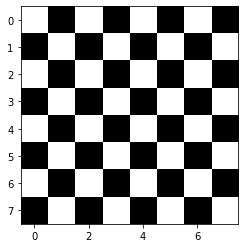

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un tableau numpy pour le damier
damier = np.zeros((8, 8))

# Remplir le damier avec des carrés noirs et blancs
damier[1::2,::2] = 1
damier[::2,1::2] = 1

# Afficher le damier
plt.imshow(damier, cmap='binary')
plt.show()


In [32]:
nb = 0
i=0; j=7;
valeur =1
def normal(number, b1=8, b2=8):
    if number>+b1 or number>=b2 or number<0:
        return False
    else:
        return True
    
for plus_on_ligne in [-1, 0,1]:
    for plus_on_col in [-1, 0,1]:
        ligne = i+plus_on_ligne
        col= j+plus_on_col
        if normal(ligne) and normal(col) and (ligne, col)!=(i,j):
            if damier[ligne, col] == valeur:
                nb+=1
        else:
            print("Normal", normal(ligne))
            print("Normal", normal(col))
            print("Same",(ligne, col))
            
print(nb)

Normal False
Normal True
Same (-1, 6)
Normal False
Normal True
Same (-1, 7)
Normal False
Normal False
Same (-1, 8)
Normal True
Normal True
Same (0, 7)
Normal True
Normal False
Same (0, 8)
Normal True
Normal False
Same (1, 8)
1


In [ ]:
(1,2)!=